# Data Description:
The data at hand contains medical costs of people
characterized by certain attributes.

# Domain:
Healthcare

# Context:

Leveraging customer information is paramount for most
businesses. In the case of an insurance company, attributes of
customers like the ones mentioned below can be crucial in
making business decisions. Hence, knowing to explore and
generate value out of such data can be an invaluable skill to
have.

# Attribute Information:
age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body,
weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of
height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance /
Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast,
southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance.
Learning Outcomes:

● Exploratory Data Analysis
● Practicing statistics using Python
● Hypothesis testing

# Objective:

We want to see if we can dive deep into this data to find some
valuable insights.


# 1. Import the necessary libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind



# 2. Read the data as a data frame


In [2]:
dataframe = pd.read_csv('insurance.csv')

In [3]:
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3. Perform basic EDA which should include the following and print out your insights at every step

# a. Shape of the data

In [4]:
dataframe.shape
print(f'{dataframe.shape}')

(1338, 7)


# b. Data type of each attribute


In [5]:
dataframe.dtypes
print(f'{dataframe.dtypes}')

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [6]:
dataframe.info()
print(f'{dataframe.dtypes}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


# c. Checking the presence of missing values


In [7]:
missing_data = dataframe.notnull()
missing_data
dataframe[missing_data]


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [8]:
missing_data.shape

(1338, 7)

# No missing values from the data

# --------------------------------------------------------------------------------------------------------------

# d. 5 point summary of numerical attributes


In [9]:
dataframe.describe(include = "all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


# e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.


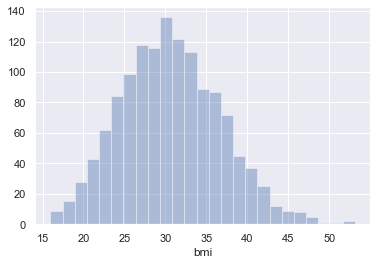

In [10]:
sns.distplot(dataframe['bmi'],kde = False)
plt.show()

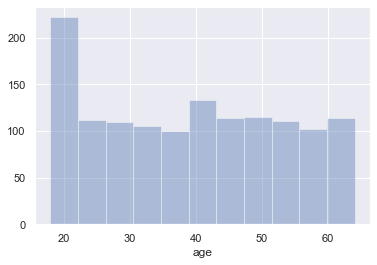

In [11]:
sns.distplot(dataframe['age'], kde = False)
plt.show()

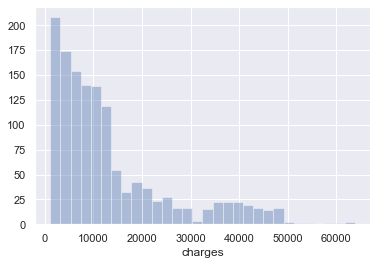

In [12]:
sns.distplot(dataframe['charges'],kde=False)
plt.show()

# f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

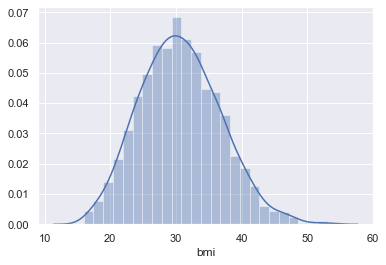

In [13]:
sns.distplot(dataframe['bmi'],kde = True)
plt.show()

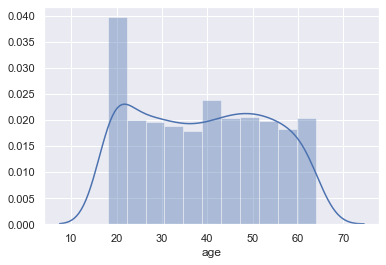

In [14]:
sns.distplot(dataframe['age'],kde = True)
plt.show()

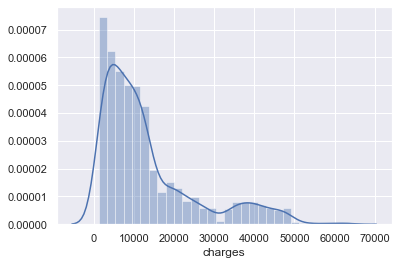

In [15]:
sns.distplot(dataframe['charges'],kde = True)
plt.show()

# g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns


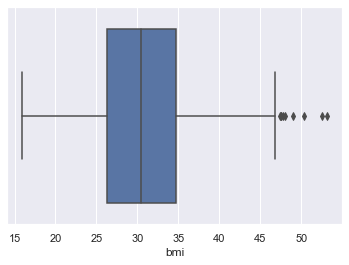

In [16]:
sns.boxplot(dataframe['bmi'])
plt.show()

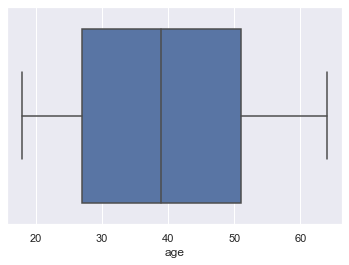

In [17]:
sns.boxplot(dataframe['age'])
plt.show()

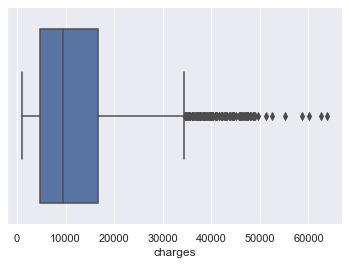

In [18]:
sns.boxplot(dataframe['charges'])
plt.show()

# h. Distribution of categorical columns (include children)


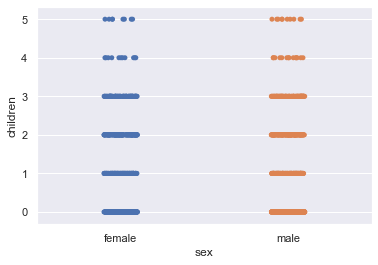

In [20]:
sns.stripplot(dataframe['sex'],dataframe['children'])
plt.show()

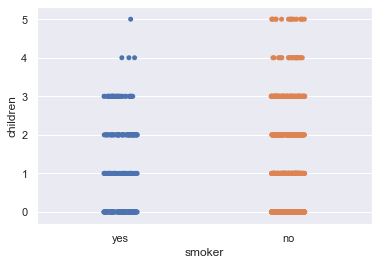

In [21]:
sns.stripplot(dataframe['smoker'],dataframe['children'])
plt.show()

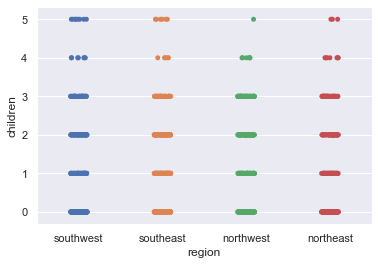

In [22]:
sns.stripplot(dataframe['region'],dataframe['children'])
plt.show()

# i. Pair plot that includes all the columns of the dataframe


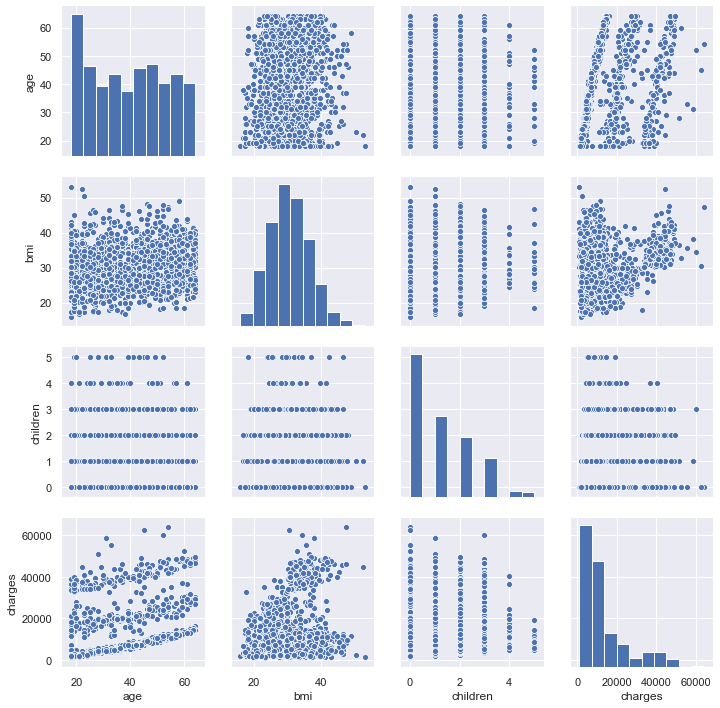

In [23]:
sns.pairplot(dataframe)
plt.show()

# 4. Answer the following questions with statistical evidence


# a. Do charges of people who smoke differ significantly from the people who don't?

In [24]:
#viewing the data for addressing the problem
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
#Hypothesis:
#  Null Hypothesis - Mean Charges of people who smoke = Mean Charges of people who dont smoke [M1 = M2]
#  Alternate Hypothesis - Mean Charges of people who smoke differs significantly or != Mean Charges of people who dont smoke [M1 != M2]
#  this is found to be a two sample test in which samples are indepedent in producing a continuous data
#  Hence we must use the t-2sample test statistic

In [26]:
smokerdf = dataframe.loc[:, ['smoker','charges']]
smokerdf.replace(to_replace = 'yes', value = 0, inplace = True)
smokerdf.replace(to_replace = 'no', value = 1, inplace = True)
smokerdf



,smoker,charges
0,0,16884.92400
1,1,1725.55230
2,1,4449.46200
3,1,21984.47061
4,1,3866.85520
5,1,3756.62160
6,1,8240.58960
7,1,7281.50560
8,1,6406.41070
9,1,28923.13692


In [27]:
smoker = smokerdf[smokerdf.smoker == 0]
smoker = smoker.loc[:,['charges']]
smoker

nonsmoker = smokerdf[smokerdf.smoker == 1]
nonsmoker = nonsmoker.loc[:,['charges']]

t_stat,p_value = ttest_ind(smoker, nonsmoker)
print(t_stat,p_value)

[46.66492117] [8.27143584e-283]


In [28]:
if p_value < 0.05:
    print (f't_stat is {t_stat}, p_value is {p_value} Null Hypothesis is rejected and Mean charges of smokers differ significantly from the mean charges of non-smokers')
else:
    print (f't_stat is %2f {t_stat}, p_value is {p_value} Null Hypothesis cannot be rejected and Mean charges of smokers may not differ significantly from the mean charges of non-smokers')

t_stat is [46.66492117], p_value is [8.27143584e-283] Null Hypothesis is rejected and Mean charges of smokers differ significantly from the mean charges of non-smokers


# ---------------------------------------------------------------------------------------

# b. Does bmi of males differ significantly from that of females?

In [29]:
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
#Hypothesis:
#  Null Hypothesis - Mean of BMI's of male  = Mean of BMI's of female [M1 = M2]
#  Alternate Hypothesis - Mean of BMI's of male differs significantly or != Mean of BMI's of female [M1 != M2]
#  this is found to be a two sample test in which samples are indepedent in producing a continuous data
#  Hence we must use the t-2sample test statistic

In [31]:
BMI = dataframe.loc[:,['sex','bmi']]
BMI
BMI.replace(to_replace ='male', value = 1, inplace = True)
BMI.replace(to_replace ='female', value = 0, inplace = True)
BMI

,sex,bmi
0,0,27.900
1,1,33.770
2,1,33.000
3,1,22.705
4,1,28.880
5,0,25.740
6,0,33.440
7,0,27.740
8,1,29.830
9,0,25.840


In [32]:
Male_BMI = BMI[BMI.sex == 1]
Male_BMI = Male_BMI.loc[:, ['bmi']]
Male_BMI
Female_BMI = BMI [BMI.sex == 1]
Female_BMI = Female_BMI.loc[:, ['bmi']]
Female_BMI

,bmi
1,33.770
2,33.000
3,22.705
4,28.880
8,29.830
10,26.220
12,34.400
14,42.130
15,24.600
17,23.845


In [33]:
tstat,p1value = ttest_ind(Male_BMI,Female_BMI)
print(tstat,p1value)

[0.] [1.]


In [34]:
if p1value < 0.05:
    print (f'tstat is {tstat}, pvalue is {p1value} Null Hypothesis is rejected and Mean of BMIs of male differ significantly from Mean of BMIs of female')
else:
    print (f'tstat is {tstat}, pvalue is {p1value} Null Hypothesis cant be rejected and Mean of BMIs of male does not differ significantly from Mean of BMIs of female')

tstat is [0.], pvalue is [1.] Null Hypothesis cant be rejected and Mean of BMIs of male does not differ significantly from Mean of BMIs of female


# c. Is the proportion of smokers significantly different in different genders?


In [35]:
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [36]:
#Hypothesis:
#  Null Hypothesis - Proportion of Male smokers = Proportion of female smokers [P1 = P2]
#  Alternate Hypothesis - Proportion of Male smokers differ significantly from Proportion of female smokers [P1 != P2]
#  this is found to be a two sample proportion test in which samples are categorical
#  Hence we must use the 2 sample proportion ztest statistic

In [37]:
#count of male or female smokers
female_smoker = dataframe[dataframe['sex'] == 'female'].smoker.value_counts()[1]
print({female_smoker})
male_smoker = dataframe[dataframe['sex'] == 'male'].smoker.value_counts()[1]
print({male_smoker})

{115}
{159}


In [38]:
#count of male or female
female_count = dataframe.sex.value_counts()[1]
print({female_count})
male_count = dataframe.sex.value_counts()[0]
print({male_count})

{662}
{676}


In [39]:
print(f'Ratio of smokers in male and female counts are {round(male_smoker/male_count,2)} and {round(female_smoker/female_count,2)}')
 

Ratio of smokers in male and female counts are 0.24 and 0.17


In [40]:
from statsmodels.stats.proportion import proportions_ztest
zstat, pvalue = proportions_ztest([male_smoker,female_smoker],[male_count,female_count])
print(zstat,pvalue)

2.7867402154855503 0.005324114164320532


In [41]:
if pvalue < 0.05:
    print (f'zstat is {zstat}, pvalue is {pvalue} Null Hypothesis is rejected Proportion of Male smokers differ from Proportion of female smokers')
else:
    print (f'tstat is {zstat}, pvalue is {pvalue} Null Hypothesis cant be rejected and Proportion of Male smokers does not differ from Proportion of female smokers')

zstat is 2.7867402154855503, pvalue is 0.005324114164320532 Null Hypothesis is rejected Proportion of Male smokers differ from Proportion of female smokers


# d. Is the distribution of bmi across women with no children, one child and two children, the same ?


In [42]:
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [43]:
womendf = dataframe[dataframe['sex'] == 'female']
womendf = womendf[(womendf['children'] == 0) | (womendf['children'] == 1) | (womendf['children'] == 2) ]
womendf = womendf.loc[:,['sex','children','bmi']]
#womendf = womendf.sort_values('children')
womendf

,sex,children,bmi
0,female,0,27.900
5,female,0,25.740
6,female,1,33.440
9,female,0,25.840
11,female,0,26.290
13,female,0,39.820
16,female,1,30.780
20,female,0,36.005
21,female,1,32.400
23,female,1,31.920


In [44]:
#exploring data graphically by box plot

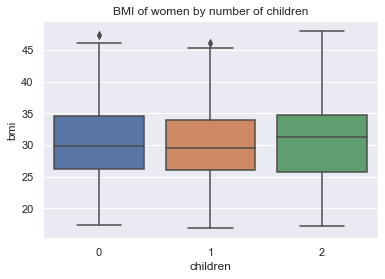

In [45]:
sns.boxplot(x="children",y="bmi",data=womendf)
plt.title('BMI of women by number of children')
plt.show()

In [46]:
#Hypothesis:
#  Null Hypothesis - Mean of BMI's of women with 0 children = 1 children = 2 children [M1 = M2 = M3]
#  Alternate Hypothesis - Atleast one of the Mean of BMI's varies from other two
#  this is found to be a three groups 
#  Hence we must apply one ANOVA test of variance of means to calculate f stat and p value


In [47]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('bmi ~ C(children)', data = womendf).fit()
aov_table = sm.stats.anova_lm(mod,typ=2)
print(aov_table)

                   sum_sq     df         F    PR(>F)
C(children)     24.590123    2.0  0.334472  0.715858
Residual     20695.661583  563.0       NaN       NaN


In [223]:
#Since P value is >0.05 null hypothesis cant be rejected.The distribution of bmi across women with no
#children, one child and two children might be the same